In [12]:
from google.colab import drive
import sys
import os
drive.mount('/content/gdrive')
drivePath = ('/content/gdrive/My Drive/DataViskom')
sys.path.append(drivePath)
os.chdir(drivePath)
current_dir = os.getcwd()
current_dir

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/DataViskom'

In [59]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

airplane_df = pd.read_csv('airplane_price_dataset.csv')

# memanggil 5 data pertama
airplane_df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


In [60]:
airplane_df.rename(columns={
    'Model': 'Model',
    'Üretim Yılı': 'Year',
    'Motor Sayısı': 'Engines',
    'Motor Türü': 'EngineType',
    'Kapasite': 'Capacity',
    'Menzil (km)': 'Range',
    'Yakıt Tüketimi (L/saat)': 'FuelConsumption',
    'Saatlik Bakım Maliyeti ($)': 'HourlyCost',
    'Yaş': 'Age',
    'Satış Bölgesi': 'SalesRegion',
    'Fiyat ($)': 'Price'
}, inplace=True)

airplane_df.head()

,Model,Year,Engines,EngineType,Capacity,Range,FuelConsumption,HourlyCost,Age,SalesRegion,Price
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


Kode di atas digunakan untuk mengganti nama kolom dalam dataset `airplane_df` dari bahasa Turki ke bahasa Inggris menggunakan metode `.rename()`. Dictionary dalam parameter `columns={}` menentukan perubahan nama kolom, misalnya `Üretim Yılı` menjadi `Year` dan `Fiyat ($)` menjadi `Price`.

Argumen `inplace=True` memastikan perubahan dilakukan langsung pada dataset tanpa perlu menyimpannya ke variabel baru. Terakhir, `airplane_df.head()` menampilkan lima baris pertama dari dataset setelah perubahan nama kolom.

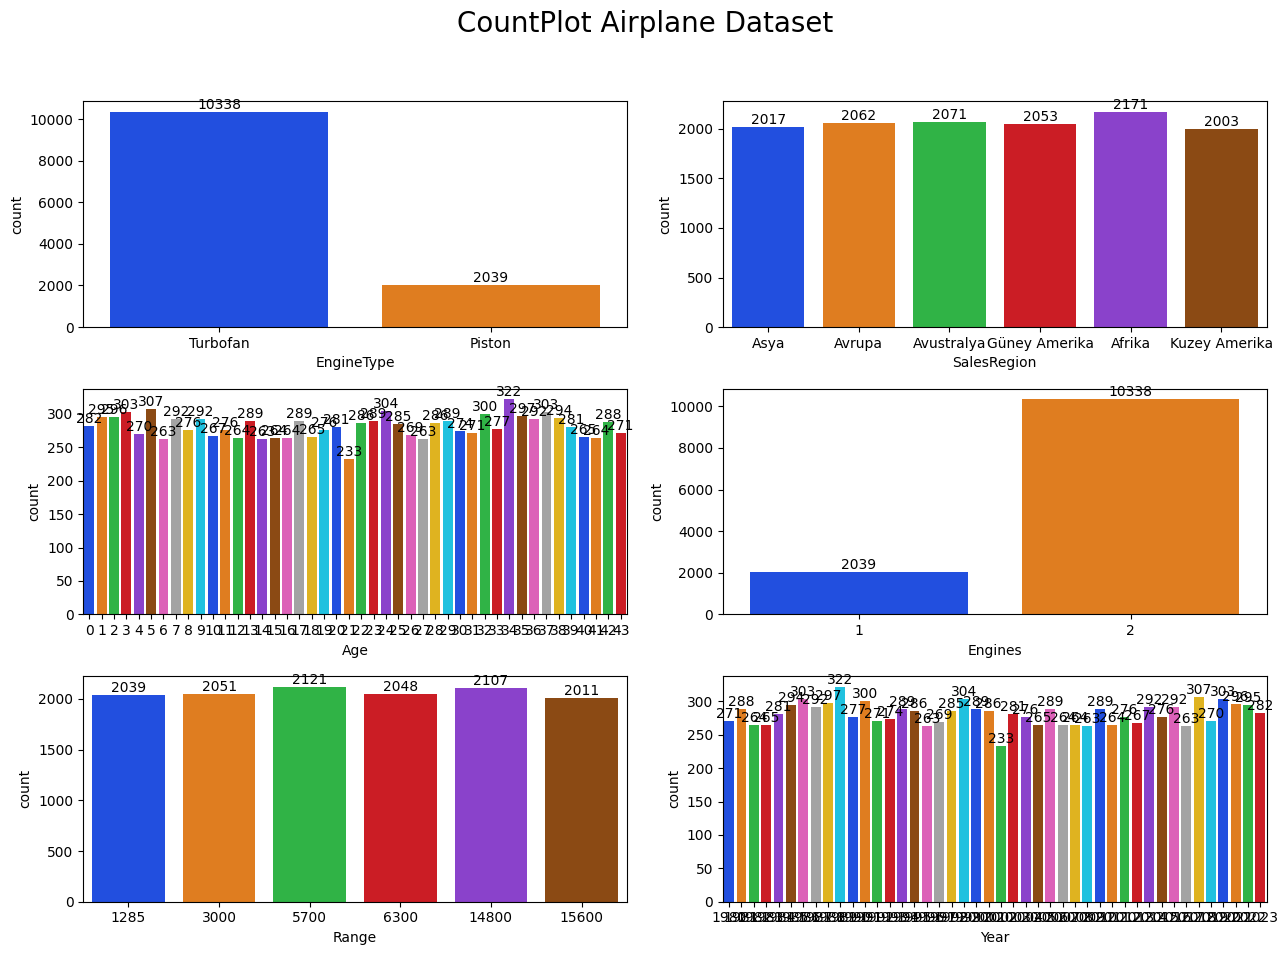

In [61]:
n_rows = 3
n_cols = 2
kolom = ["EngineType", "SalesRegion", "Age", "Engines", "Range", "Year",]

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(13, 10))
fig.suptitle('CountPlot Airplane Dataset', fontsize=20)

i = 0
for row in range(n_rows):
    for col in range(n_cols):
        if i < len(kolom):
            sns.countplot(x=kolom[i], data=airplane_df, ax=axes[row, col], hue=kolom[i], palette="bright", legend=False)

            # Menampilkan label nilai per unique value
            for p in axes[row, col].patches:
                axes[row, col].annotate(f'{int(p.get_height())}',
                                        (p.get_x() + p.get_width() / 2., p.get_height()),
                                        ha='center', va='bottom')
            i += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Kode diatas digunakan untuk untuk memeriksa konsistensi data pada dataset `airplane_df` untuk kolom-kolom seperti `EngineType`, `SalesRegion`, `Age`, `Engines`, `Range`, dan `Year`.

`CountPlot` digunakan untuk memvisualisasikan sebaran nilai setiap kolom, dengan label ditambahkan di atas batang untuk menampilkan jumlah data pada setiap kategori.

In [62]:
# Menghapus kolom yang tidak diperlukan
airplane_df.drop(columns=['Age', 'SalesRegion'], inplace=True)
airplane_df.head()

,Model,Year,Engines,EngineType,Capacity,Range,FuelConsumption,HourlyCost,Price
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,2.037981e+05


In [63]:
airplane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            12377 non-null  object 
 1   Year             12377 non-null  int64  
 2   Engines          12377 non-null  int64  
 3   EngineType       12377 non-null  object 
 4   Capacity         12377 non-null  int64  
 5   Range            12377 non-null  int64  
 6   FuelConsumption  12377 non-null  float64
 7   HourlyCost       12377 non-null  float64
 8   Price            12377 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 870.4+ KB


In [64]:
airplane_df.isnull().sum()

,0
Model,0
Year,0
Engines,0
EngineType,0
Capacity,0
Range,0
FuelConsumption,0
HourlyCost,0
Price,0


Kode `airplane_df.info()` dan `airplane_df.isnull().sum()` digunakan untuk menampilkan informasi tentang DataFrame berupa nama kolom, data yang `null` dan `not-null`, dan tipe data. Dari output diatas, tidak ada nilai yang hilang `(null)` di semua kolom, yang ditunjukkan oleh `"12377 non-null"` untuk setiap kolom.

In [65]:
# Data Label Encoding
airplane_df.EngineType=airplane_df.EngineType.map({'Turbofan':1, 'Piston':2})
airplane_df.head()

,Model,Year,Engines,EngineType,Capacity,Range,FuelConsumption,HourlyCost,Price
0,Bombardier CRJ200,1987,2,1,50,3000,14.36,2185.43,1.285708e+07
1,Bombardier CRJ200,1997,2,1,50,3000,4.03,1202.08,1.391406e+07
2,Airbus A320,1988,2,1,180,6300,13.26,761.38,9.073570e+07
3,Boeing 737,2023,2,1,162,5700,14.61,592.63,1.366597e+08
4,Cessna 172,1985,1,2,4,1285,18.49,4245.99,2.037981e+05


Kode di atas melakukan proses label encoding pada kolom `EngineType` dalam DataFrame `airplane_df`. Pada kode tersebut, kolom `EngineType` yang berisi jenis mesin pesawat yang berupa kategori seperti `'Turbofan'` dan `'Piston'` diubah menjadi angka. `'Turbofan'` diberi nilai `1` dan `'Piston'` diberi nilai `2`.

In [69]:
# Simple Feature Scaling

df_simplescaler = airplane_df.copy()
df_simplescaler['Range'] = df_simplescaler['Range']/df_simplescaler['Range'].max()
df_simplescaler['HourlyCost'] = df_simplescaler['HourlyCost']/df_simplescaler['HourlyCost'].max()
df_simplescaler['Capacity'] = df_simplescaler['Capacity']/df_simplescaler['Capacity'].max()

df_simplescaler.head()

,Model,Year,Engines,EngineType,Capacity,Range,FuelConsumption,HourlyCost,Price
0,Bombardier CRJ200,1987,2,1,0.126263,0.192308,14.36,0.437116,1.285708e+07
1,Bombardier CRJ200,1997,2,1,0.126263,0.192308,4.03,0.240432,1.391406e+07
2,Airbus A320,1988,2,1,0.454545,0.403846,13.26,0.152286,9.073570e+07
3,Boeing 737,2023,2,1,0.409091,0.365385,14.61,0.118534,1.366597e+08
4,Cessna 172,1985,1,2,0.010101,0.082372,18.49,0.849256,2.037981e+05


Kode diatas adalah implementasi *simple feature scaling* pada dua kolom dalam DataFrame `airplane_df`, yaitu kolom `Range`, `HourlyCost`, dan `Capacity`. Proses ini dilakukan dengan membagi setiap nilai dalam kolom tersebut dengan nilai maksimum pada kolom yang sama (`df_simplescaler['Range'].max()` dan `df_simplescaler['Capacity'].max()`).

Hasilnya, nilai-nilai pada kolom `Range`, `HourlyCost`, dan `Capacity` akan berada dalam rentang 0 hingga 1. Fungsi ini membantu untuk menskalakan fitur-fitur agar memiliki skala yang sama.